# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Ron 5248
# student 2: Shani 1477
# student 3: Paulo 2055

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, normalized_mutual_info_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

In [2]:
housing_test = pd.read_csv('housing_test.csv')
housing_train = pd.read_csv('housing_train.csv')

In [4]:
housing_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,5.3254,32.0,5.786260,1.033079,982.0,2.498728,34.29,-119.27,3.852
1,5.3032,52.0,5.095745,1.028369,980.0,3.475177,34.08,-118.12,2.457
2,4.1679,41.0,6.617486,1.371585,915.0,2.500000,37.05,-122.05,2.013
3,3.6429,28.0,5.249180,1.009836,848.0,2.780328,38.69,-121.41,1.052
4,2.7457,17.0,11.183267,2.107570,675.0,2.689243,38.88,-119.99,1.078


In [5]:
housing_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4.0179,46.0,4.158690,1.032746,512.0,1.289673,34.07,-118.35,3.500
1,2.7002,6.0,4.149245,1.179989,4092.0,2.287311,34.05,-117.31,0.883
2,1.2762,17.0,3.432331,1.022556,1325.0,2.490602,34.42,-119.69,2.536
3,4.9342,23.0,5.735798,1.053201,4580.0,4.129847,34.04,-117.93,1.810
4,2.2755,21.0,4.064607,0.962079,2109.0,2.962079,32.58,-117.11,1.250


In [6]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       16512 non-null  float64
 1   HouseAge     16512 non-null  float64
 2   AveRooms     16512 non-null  float64
 3   AveBedrms    16512 non-null  float64
 4   Population   16512 non-null  float64
 5   AveOccup     16512 non-null  float64
 6   Latitude     16512 non-null  float64
 7   Longitude    16512 non-null  float64
 8   MedHouseVal  16512 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


In [7]:
housing_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.863517,28.650678,5.412479,1.093546,1424.287609,3.101201,35.631452,-119.566283,2.065267
std,1.878577,12.623994,2.088680,0.378594,1139.012630,11.587773,2.137537,2.006552,1.151219
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.564375,18.000000,4.448665,1.005988,789.000000,2.431070,33.930000,-121.800000,1.192000
50%,3.536650,29.000000,5.225511,1.048780,1167.000000,2.816355,34.250000,-118.490000,1.796000
75%,4.744375,37.000000,6.046629,1.099691,1722.000000,3.281612,37.710000,-118.000000,2.647000
max,15.000100,52.000000,62.422222,15.312500,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
housing_train.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

### Distribution of features

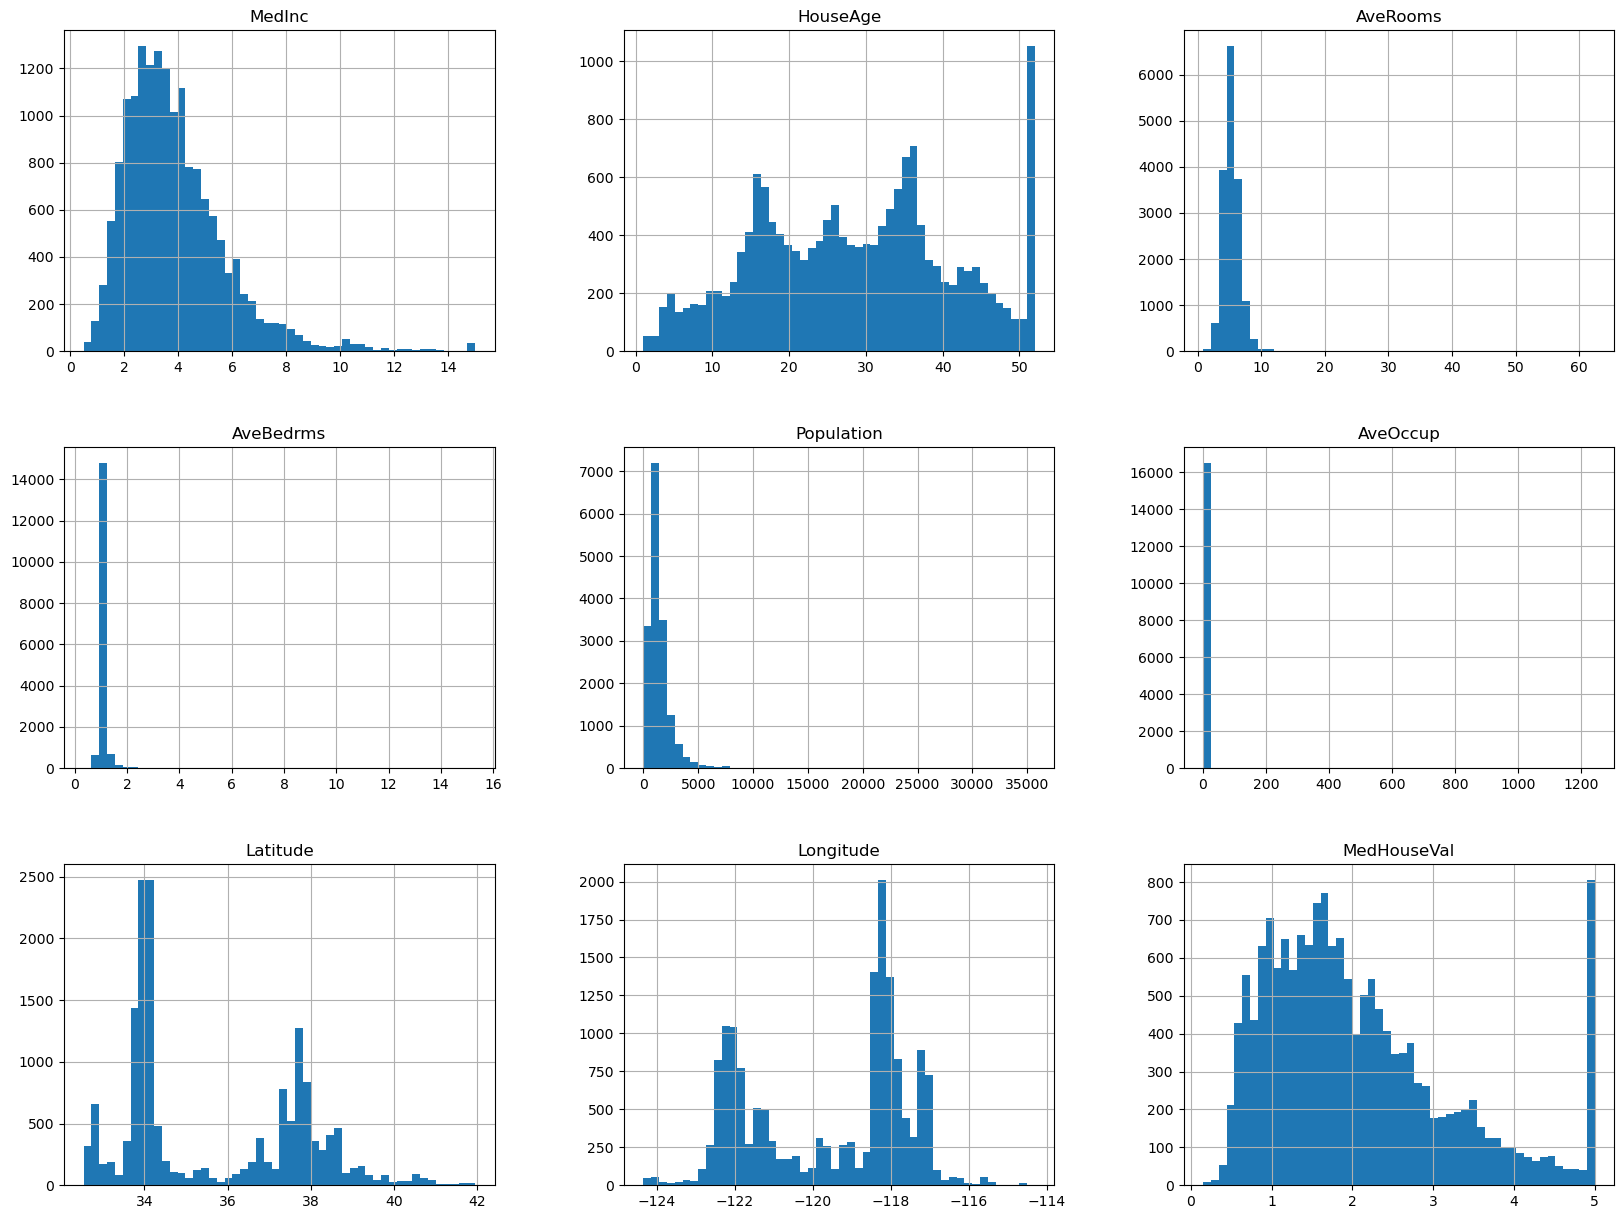

In [9]:
housing_train.hist(bins=50, figsize=(20,15))
plt.show()

## Distribution summary
#### We can see that there is skewed distribution in the features: MedInc, AveRooms, AveBedrms, Population, AveOccup, MedHouseVal.
#### The feature HouseAge and the target MedHouseVal are distributed normally.

### Correlation

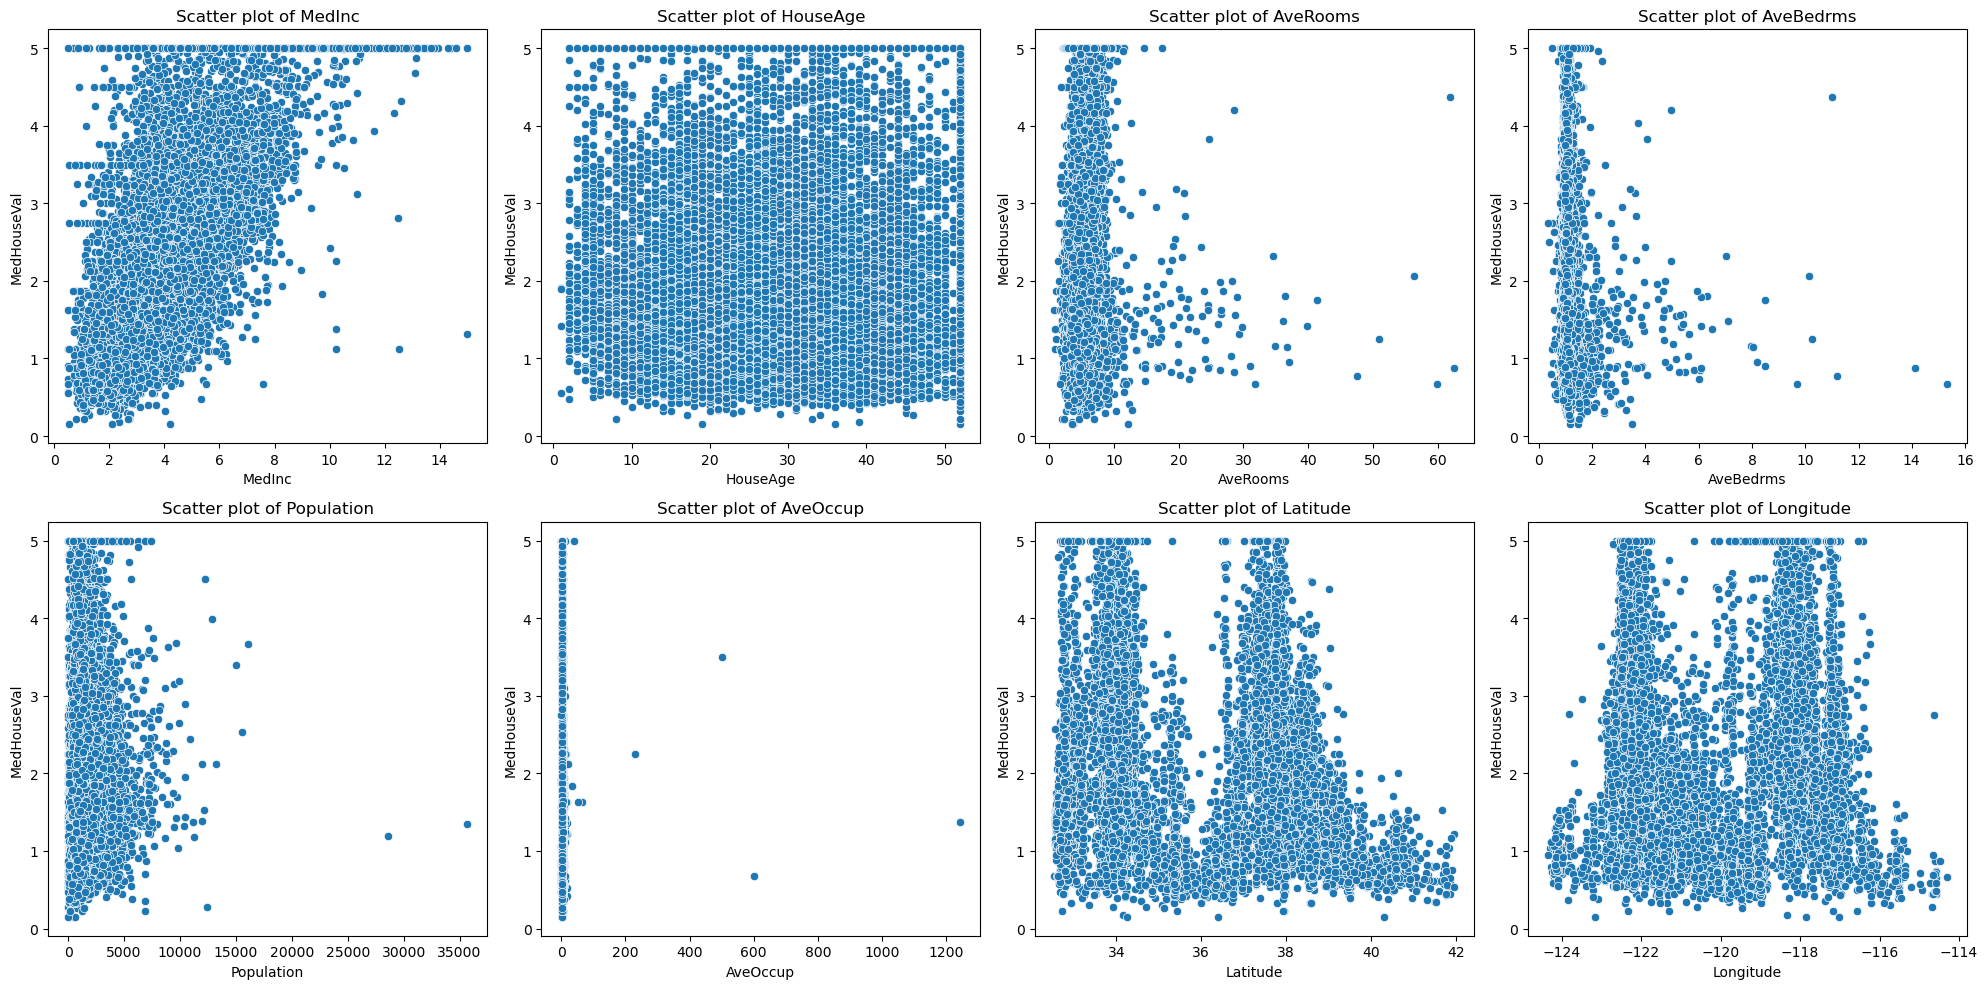

In [10]:
target_lable = 'MedHouseVal'

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(housing_train.columns):
    if feature != target_lable:
        sns.scatterplot(x=housing_train[feature], y=housing_train[target_lable], ax=axes[i])
        axes[i].set_title(f'Scatter plot of {feature}')

plt.tight_layout()
plt.show()

### We can see above that the only feature that has a linear relationship with the target is MedInc.

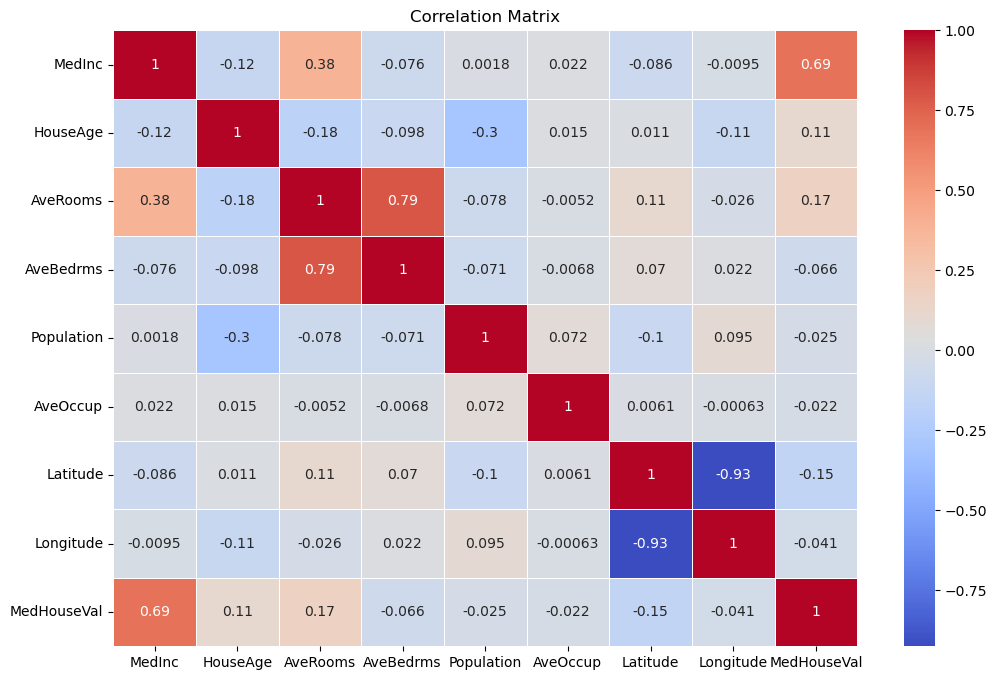

In [11]:
corr_matrix = housing_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Outliers

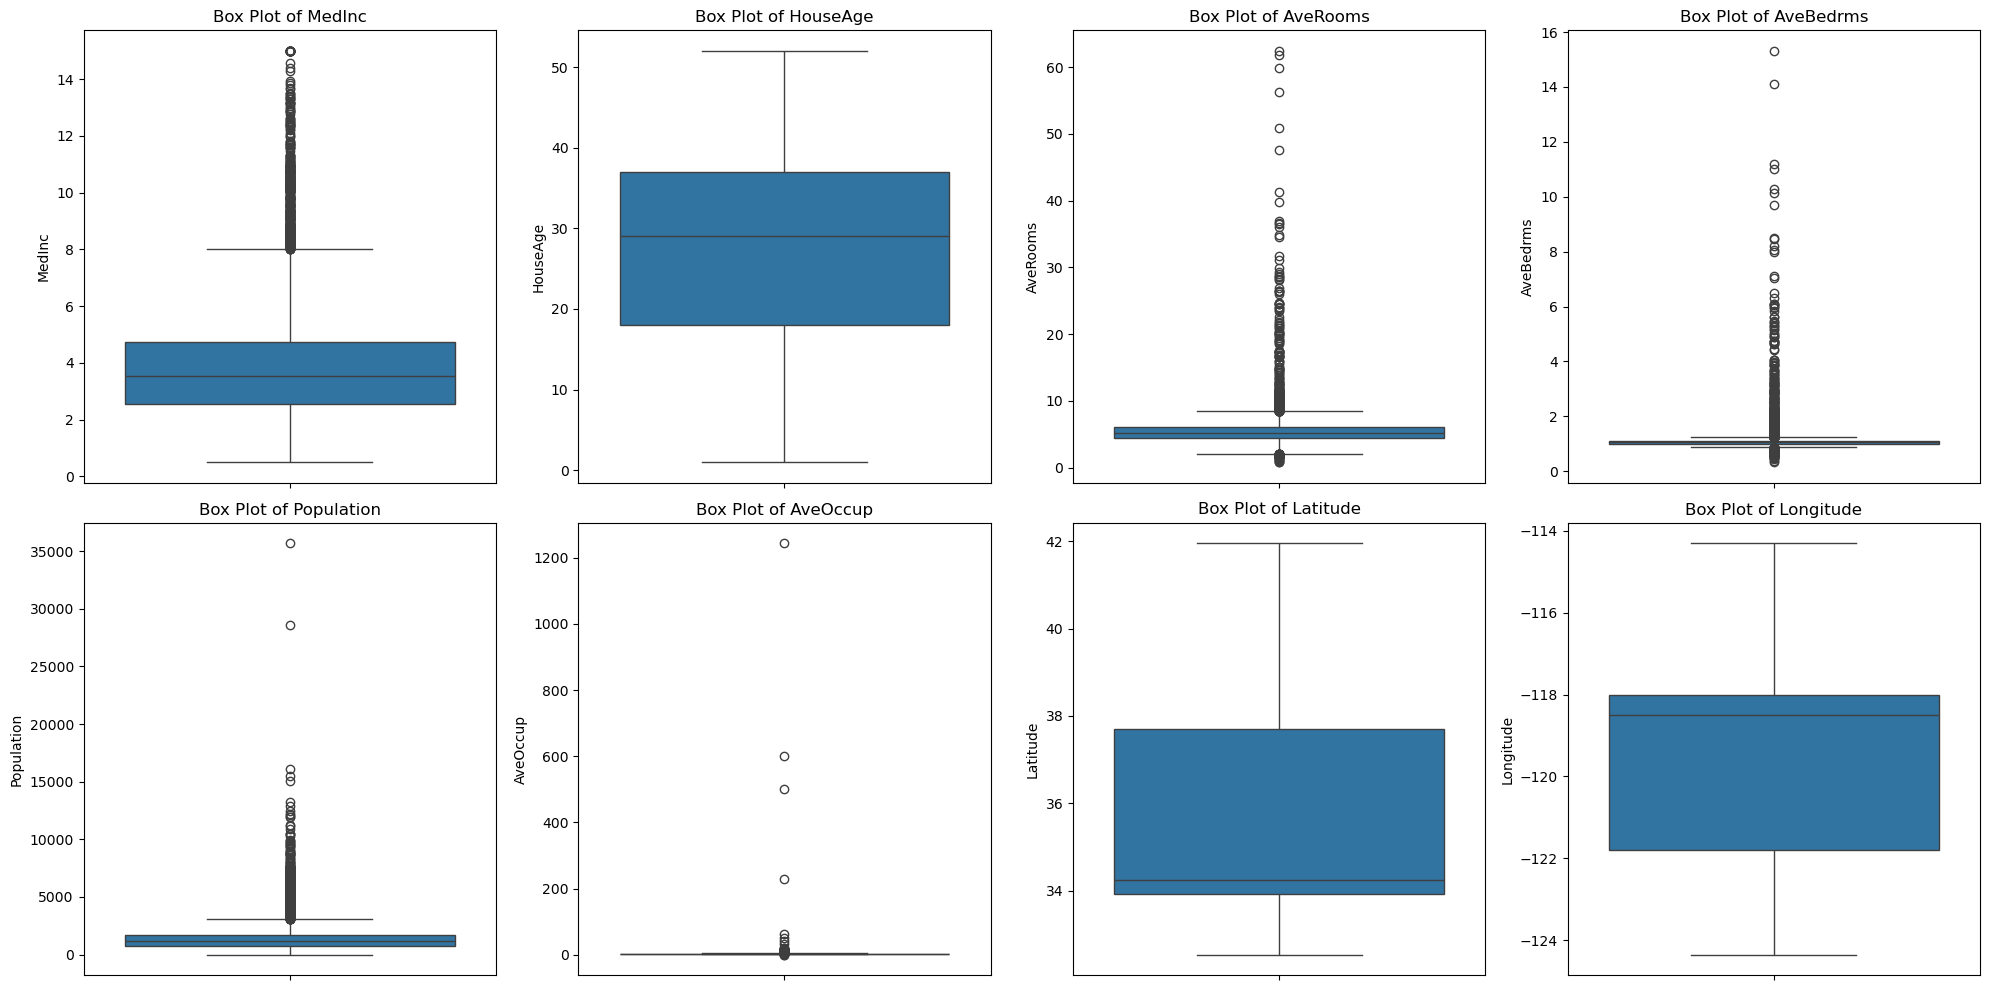

In [12]:
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # Flatten to iterate easily

for i, feature in enumerate(features):
    sns.boxplot(y=housing_train[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

### Outliers summary
#### There are outliers in the features: MedInc, AveRooms, AveBedrms, Population and AveOccup.

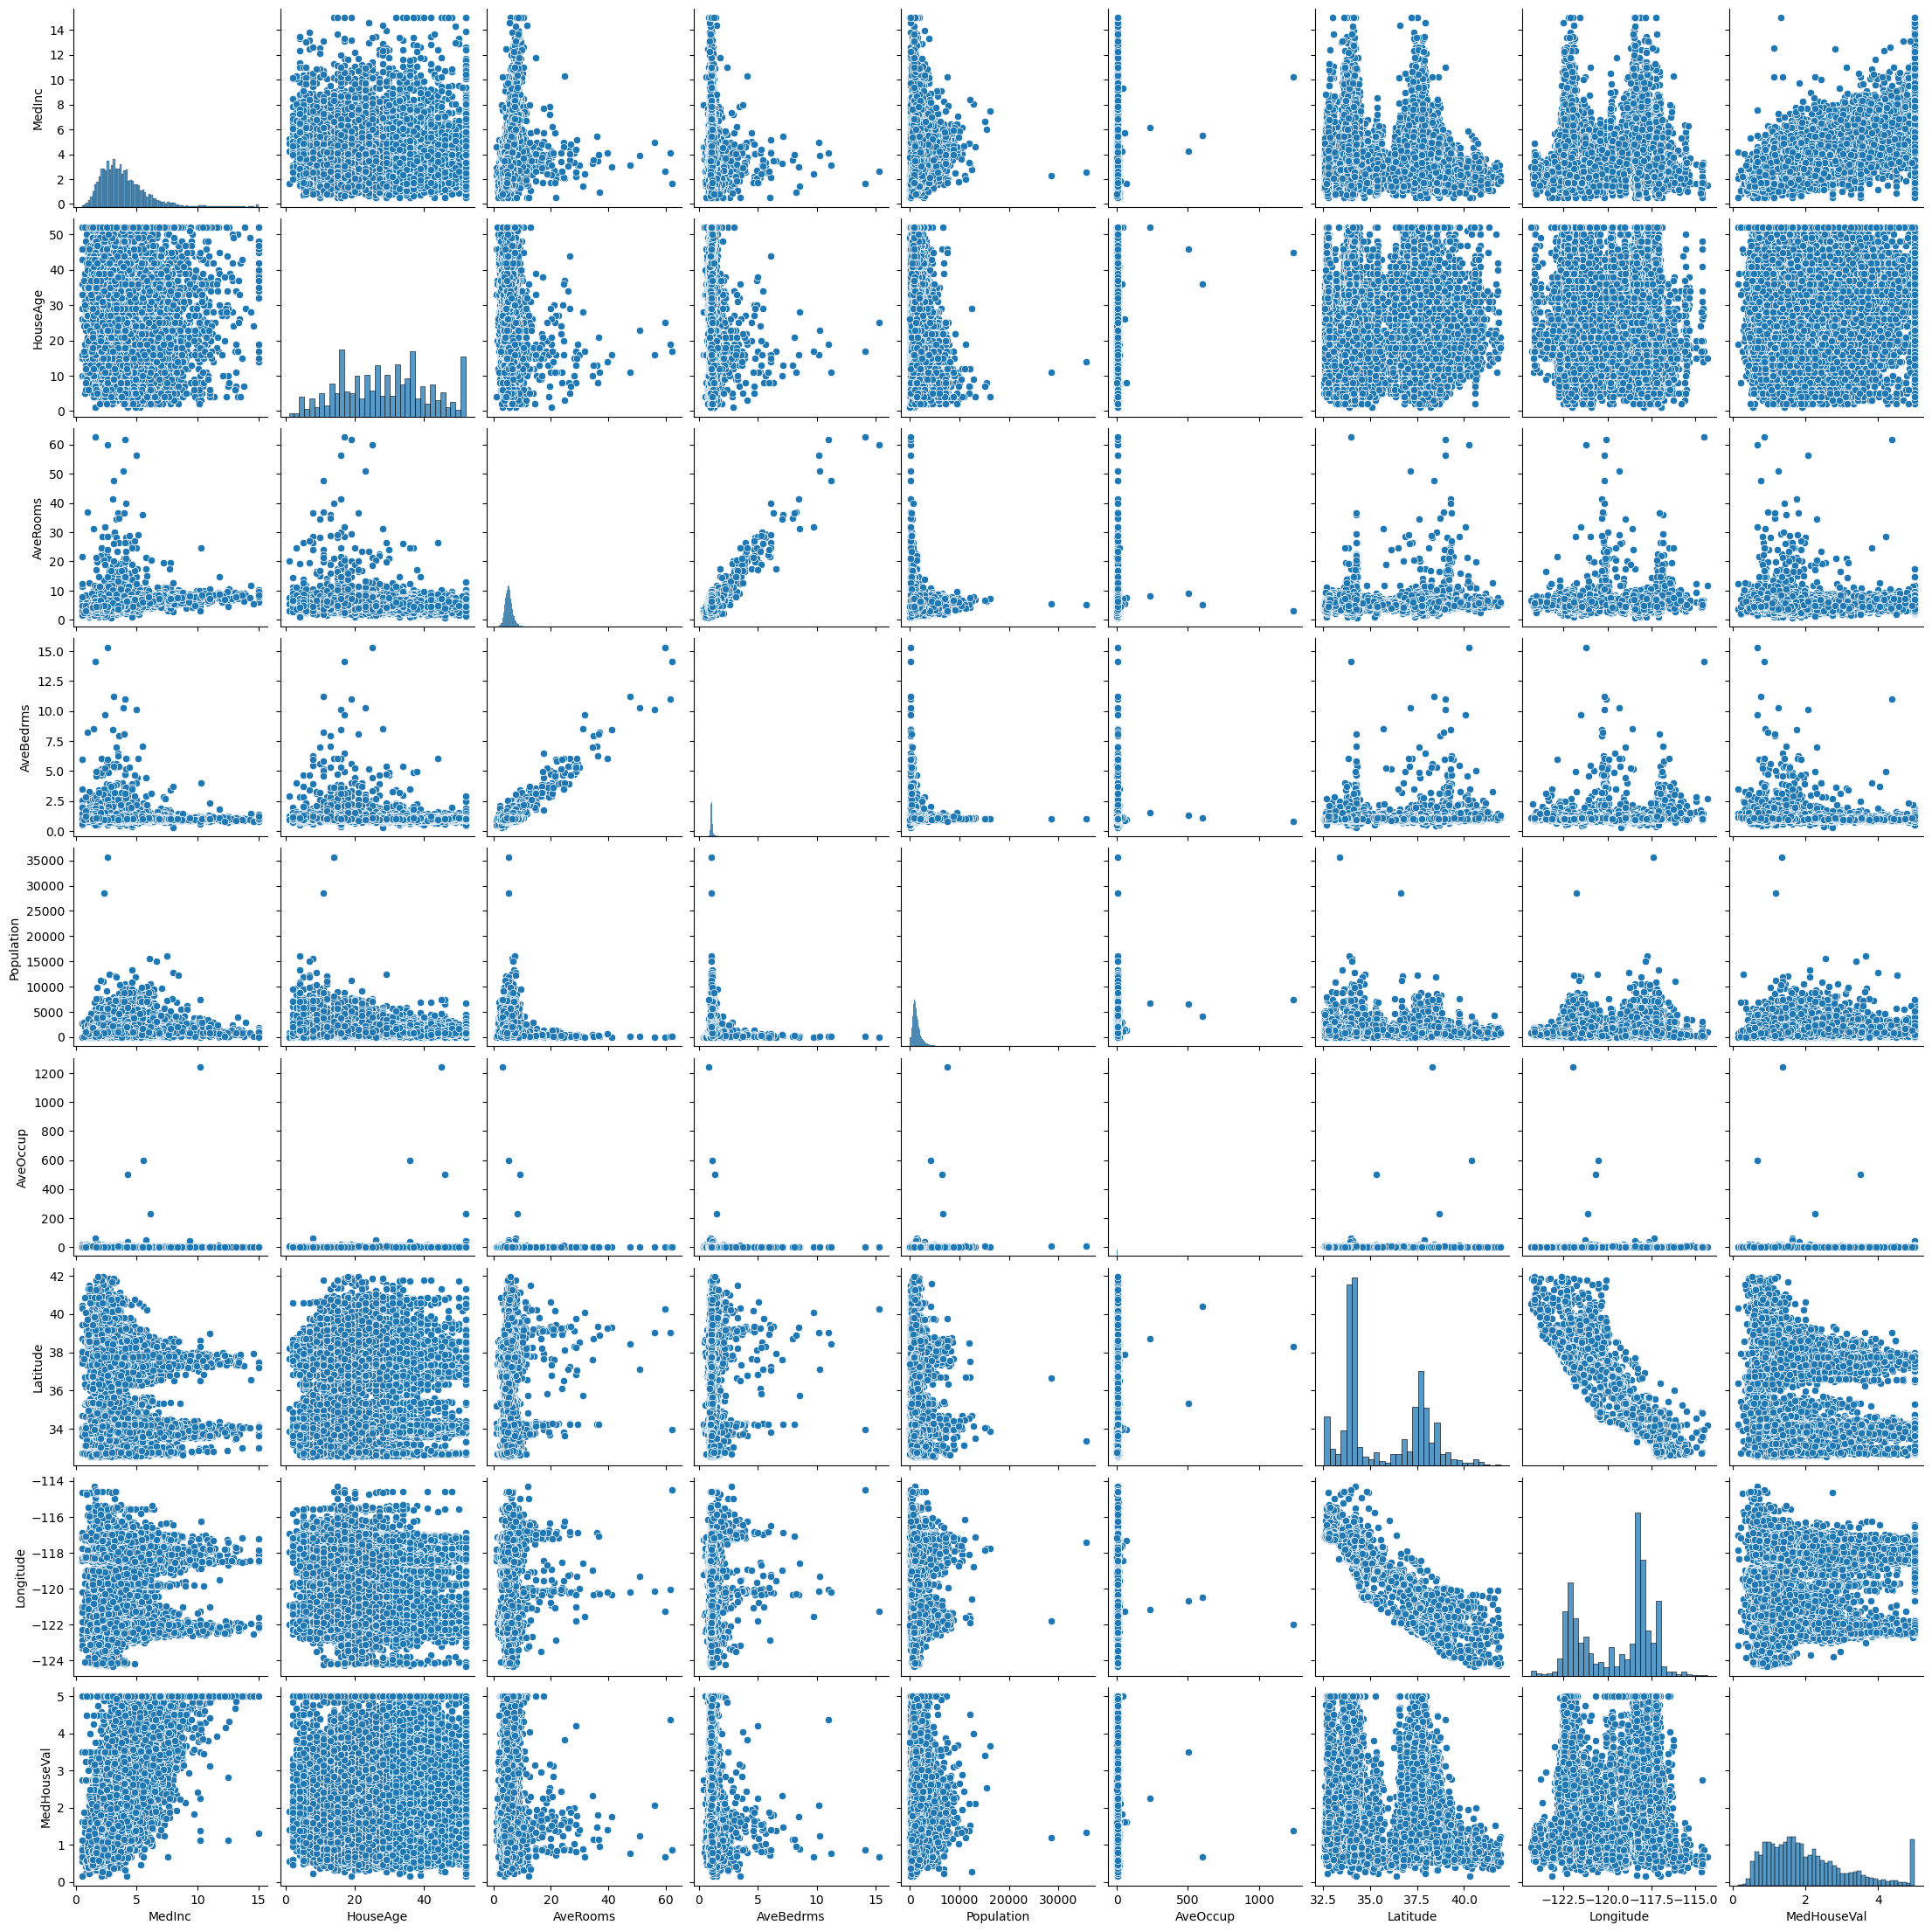

In [13]:
sns.pairplot(housing_train)

## Part 3 - Experiments
You could add as many code cells as needed

## model selection and hyperparameter tuning
### Linear Regression, Decision Tree, RandomForest
### RandomForest explanation: RandomForest algorithm is an ensemble learning method for regression that operates by constructing multiple decision trees during training and outputting the mean prediction of the individual trees. Random forests are an example of an ensemble learner built on decision trees. For this reason, it is a popular algorithm for regression tasks.

In [14]:
feature_vector = housing_train.drop('MedHouseVal', axis=1)
target = housing_train['MedHouseVal']
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42)
}

param_grids = {
    'LinearRegression': {},
    'DecisionTreeRegressor': {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 10, 20], 'min_samples_leaf': [1, 5, 10]},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_model = None
best_score = -np.inf
best_params = None
results = []

for model_name in models:
    print(f"Running GridSearchCV for {model_name}...")
    model = models[model_name]
    param_grid = param_grids[model_name]

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='r2', verbose=1)

    grid_search.fit(feature_vector, target)

    if grid_search.best_score_ > best_score:
        best_model = model_name
        best_score = grid_search.best_score_
        best_params = grid_search.best_params_
    
    results.append({
        'Model': model_name,
        'Best R^2 Score': grid_search.best_score_,
        'Best Parameters': grid_search.best_params_
    })  

results_df = pd.DataFrame(results)
results_df.style

Running GridSearchCV for LinearRegression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Running GridSearchCV for DecisionTreeRegressor...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Running GridSearchCV for RandomForest...
Fitting 5 folds for each of 9 candidates, totalling 45 fits


,Model,Best R^2 Score,Best Parameters
0,LinearRegression,0.605099,{}
1,DecisionTreeRegressor,0.714310,"{'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}"
2,RandomForest,0.802185,"{'max_depth': None, 'n_estimators': 200}"


## Evaluation of the best model:
### We used k-fold cross-validation of 5 folds and integrated in GridSearchCV to find the best learning algorithem for out type of data between 3 models and for this models we looked for the best hyperparameters. 
#### We used the R^2 score as the evaluation metric.
#### We can see that RandomForest has the best R^2 score of 0.802 with the hyperparameters: max_depth = None, n_estimators = 200. 
#### max_depth = None means that the tree will expand until all leaves are pure or until all leaves contain less than min_samples_split samples.
#### n_estimators = 200 means that the number of trees in the forest is 200.
#### The reason that it has the best score is probably because it works well with non-linear data while Linear Regression works better with Linear data.             Decision Tree is the base of random forest but it is not as good as random forest because it is a single tree and it is prone to overfitting.

## Feature Engineering:

In [19]:
y = housing_train['MedHouseVal']
x = housing_train.drop('MedHouseVal', axis=1)

### Fitting the highest r2 score model with the original features using the best hyperparameters

In [20]:
model = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=None)

### In this section we will use cross validation and selecting different features using RFE and manual feature removal to see if we can improve the model.

In [21]:
def cv_r2_grader_function(model, x, y):
    cv_scores = cross_val_score(model, x, y, cv=5, scoring='r2')
    print(f"Cross-validation R²: {cv_scores.mean()}")
    return cv_scores.mean()

In [18]:
cv_r2_grader_function(model, x, y) 

Cross-validation R²: 0.799347008025688


### Standardizing the features vector except the target feature

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

cv_r2_grader_function(model, X_scaled, y)

Cross-validation R²: 0.7994382182269455


### Removing outliers

In [20]:
clean_df = housing_train.copy(deep=True)
z_scores = (clean_df - clean_df.mean()) / clean_df.std()

threshold = 3

clean_df = clean_df[(np.abs(z_scores) < threshold).all(axis=1)]

x_clean = clean_df.drop('MedHouseVal', axis=1)
y_clean = clean_df['MedHouseVal']

cv_r2_grader_function(model, x_clean, y_clean)



Cross-validation R²: 0.7823443180732941


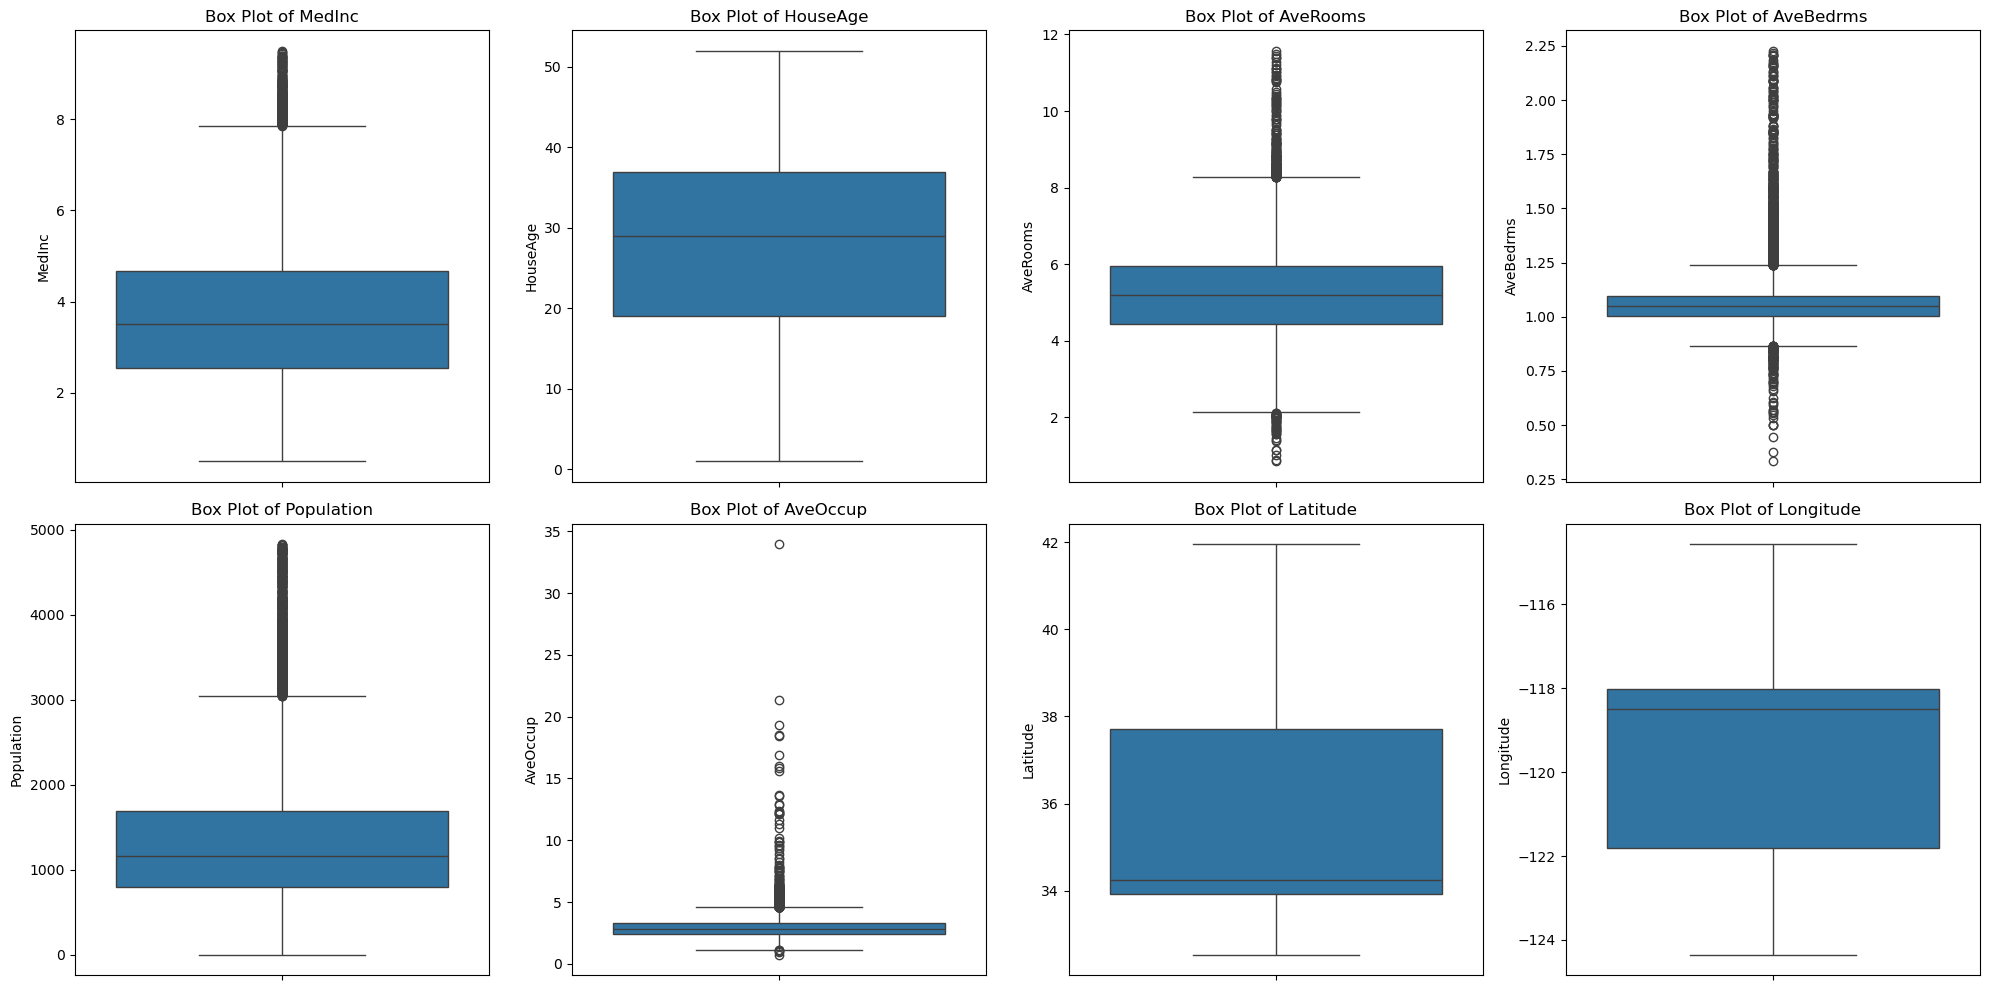

In [21]:
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # Flatten to iterate easily

for i, feature in enumerate(features):
    sns.boxplot(y=x_clean[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

### It looks like removing outliers will not improve the model.

### Feature selection using RFE
#### Recursive Feature Elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. Take as an input the model we want to tune and the number of features we want to keep.

In [22]:
selector = RFE(model, n_features_to_select=5)

X_train_selected = selector.fit_transform(x, y)
cv_r2_grader_function(model, X_train_selected, y)

Cross-validation R²: 0.8008887654877264


### Feature selection using manual removal

In [22]:
x_no_avebedrms = x.drop('AveBedrms', axis=1)

x_no_avebedrms = cv_r2_grader_function(model, x_no_avebedrms, y)

Cross-validation R²: 0.802202556109344


In [23]:
x_no_population = x.drop('Population', axis=1)

x_no_population = cv_r2_grader_function(model, x_no_population, y)

Cross-validation R²: 0.7998497235602753


In [24]:
x_no_aveoccup = x.drop('AveOccup', axis=1)

x_no_aveoccup = cv_r2_grader_function(model, x_no_aveoccup, y)

Cross-validation R²: 0.7918223768403525


In [25]:
x_no_medinc = x.drop(['MedInc'], axis=1)

x_no_medinc = cv_r2_grader_function(model, x_no_medinc, y)

Cross-validation R²: 0.8122310499388762


In [26]:
x_no_medinc_population = x.drop(['MedInc', 'Population'], axis=1)

x_no_medinc_population = cv_r2_grader_function(model, x_no_medinc_population, y)

Cross-validation R²: 0.8147905099045045


In [27]:
x_no_houseage = x.drop('HouseAge', axis=1)

x_no_houseage = cv_r2_grader_function(model, x_no_houseage, y)

Cross-validation R²: 0.8014850750645163


In [28]:
x_scaled_no_medinc_population_avebedrms = x.drop(['MedInc', 'Population', 'AveBedrms'], axis=1)

scaler = StandardScaler()
x_scaled_no_medinc_population_avebedrms = scaler.fit_transform(x_scaled_no_medinc_population_avebedrms)

x_scaled_no_medinc_population_avebedrms = cv_r2_grader_function(model, x_scaled_no_medinc_population_avebedrms, y)

Cross-validation R²: 0.8148542348454125


In [29]:
fe_df = pd.DataFrame({'Feature removed' : ['AveBedrms', 'Population', 'AveOccup', 'MedInc', 'MedInc, Population', 'HouseAge', 'MedInc, Population, HouseAge + scaled'], 'R2' : [x_no_avebedrms, x_no_population, x_no_aveoccup, x_no_medinc, x_no_medinc_population, x_no_houseage, x_scaled_no_medinc_population_avebedrms]})
fe_df.head(6)

,Feature removed,R2
0,AveBedrms,0.802203
1,Population,0.799850
2,AveOccup,0.791822
3,MedInc,0.812231
4,"MedInc, Population",0.814791
5,HouseAge,0.801485


    ### Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

### Training the highest R2 score model using best hyperparameters and the highest R2 score features

In [31]:
x = housing_train.drop(['MedHouseVal', 'MedInc', 'Population'], axis=1)
y = housing_train['MedHouseVal']
scaler = StandardScaler()
x = scaler.fit_transform(x)

model = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=None)

model.fit(x, y)

RandomForestRegressor(n_estimators=200, random_state=42)

## Part 5 - Apply on test and show model performance estimation

### Testing the model
#### We scaled the test feature vector using the same scaler we used for the training data.

In [34]:
x_test = housing_test.drop(['MedHouseVal', 'MedInc', 'Population'], axis=1)
y_test = housing_test['MedHouseVal']
x_test = scaler.transform(x_test)

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)

print(f"R² on test data: {r2}")
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result_df.head()

R² on test data: 0.839755163296869


,Actual,Predicted
0,3.852,3.05231
1,2.457,2.02083
2,2.013,3.04825
3,1.052,1.00724
4,1.078,1.24036
